# 第一次实验测试

>Bartoschek, M., Oskolkov, N., Bocci, M., Lövrot, J., Larsson, C., Sommarin, M., Madsen, C. D., Lindgren, D., Pekar, G., Karlsson, G., Ringnér, M., Bergh, J., Björklund, Å., & Pietras, K. (2018). Spatially and functionally distinct subclasses of breast cancer-associated fibroblasts revealed by single cell RNA sequencing. Nature Communications, 9(1). https://doi.org/10.1038/s41467-018-07582-3


In [1]:
library(Rtsne)
library(dbscan)

In [2]:
raw_count_file<-'tests/GSE111229_Mammary_Tumor_fibroblasts_768samples_rawCounts.txt'
fpkm_file<-'tests/GSE111229_Mammary_Tumor_fibroblasts_768samples_rpkmNormalized.txt'

count_table <- read.csv(raw_count_file,sep='\t',)
fpkm_table <- read.csv(fpkm_file,sep='\t')

In [3]:
head(count_table)

,SS2_15_0048_A3,SS2_15_0048_A6,SS2_15_0048_A5,SS2_15_0048_A4,SS2_15_0048_A1,SS2_15_0048_A2,SS2_15_0048_A8,SS2_15_0048_A9,SS2_15_0048_A7,SS2_15_0048_A10,...,SS2_15_0049_P16,SS2_15_0049_P15,SS2_15_0049_P17,SS2_15_0049_P19,SS2_15_0049_P20,SS2_15_0049_P18,SS2_15_0049_P21,SS2_15_0049_P23,SS2_15_0049_P22,SS2_15_0049_P24
0610005C13Rik,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,18,11,17,0,0,0,0,0,...,0,7,14,26,0,0,0,19,15,0
0610009B22Rik,0,0,0,0,8,0,0,0,23,0,...,0,0,0,19,0,0,0,0,5,0
0610009L18Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0
0610009O20Rik,0,0,1,1,59,28,23,0,0,0,...,25,0,0,3,0,0,0,1,10,0
0610010B08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
head(fpkm_table)

,SS2_15_0048_A3,SS2_15_0048_A6,SS2_15_0048_A5,SS2_15_0048_A4,SS2_15_0048_A1,SS2_15_0048_A2,SS2_15_0048_A8,SS2_15_0048_A9,SS2_15_0048_A7,SS2_15_0048_A10,...,SS2_15_0049_P16,SS2_15_0049_P15,SS2_15_0049_P17,SS2_15_0049_P19,SS2_15_0049_P20,SS2_15_0049_P18,SS2_15_0049_P21,SS2_15_0049_P23,SS2_15_0049_P22,SS2_15_0049_P24
0610005C13Rik,0,0,0.00000,6.966712,0.00000,0.0000,0.0000,0,0.00000,0,...,0.0000,0.00000,0.00000,0.000000,0,0.00000,0,0.000000,0.00000,0
0610007P14Rik,0,0,74.95064,69.326130,48.19687,0.0000,0.0000,0,0.00000,0,...,0.0000,72.68577,62.10689,84.345356,0,0.00000,0,73.513247,45.71572,0
0610009B22Rik,0,0,0.00000,0.000000,33.80735,0.0000,0.0000,0,86.85533,0,...,0.0000,0.00000,0.00000,91.874005,0,0.00000,0,0.000000,22.71410,0
0610009L18Rik,0,0,0.00000,0.000000,0.00000,0.0000,0.0000,0,0.00000,0,...,0.0000,0.00000,0.00000,0.000000,0,51.94705,0,0.000000,0.00000,0
0610009O20Rik,0,0,2.19008,3.314831,87.97901,40.6642,91.3424,0,0.00000,0,...,61.1007,0.00000,0.00000,5.118777,0,0.00000,0,2.035022,16.02993,0
0610010B08Rik,0,0,0.00000,0.000000,0.00000,0.0000,0.0000,0,0.00000,0,...,0.0000,0.00000,0.00000,0.000000,0,0.00000,0,0.000000,0.00000,0


In [5]:
log10_RPKM_plus_1 <- log10(fpkm_table+1)
head(log10_RPKM_plus_1)

,SS2_15_0048_A3,SS2_15_0048_A6,SS2_15_0048_A5,SS2_15_0048_A4,SS2_15_0048_A1,SS2_15_0048_A2,SS2_15_0048_A8,SS2_15_0048_A9,SS2_15_0048_A7,SS2_15_0048_A10,...,SS2_15_0049_P16,SS2_15_0049_P15,SS2_15_0049_P17,SS2_15_0049_P19,SS2_15_0049_P20,SS2_15_0049_P18,SS2_15_0049_P21,SS2_15_0049_P23,SS2_15_0049_P22,SS2_15_0049_P24
0610005C13Rik,0,0,0.0000000,0.9012791,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0000000,0,0.000000,0,0.0000000,0.000000,0
0610007P14Rik,0,0,1.8805315,1.8471167,1.691937,0.000000,0.000000,0,0.000000,0,...,0.000000,1.867384,1.800077,1.9311799,0,0.000000,0,1.8722335,1.669463,0
0610009B22Rik,0,0,0.0000000,0.0000000,1.541671,0.000000,0.000000,0,1.943768,0,...,0.000000,0.000000,0.000000,1.9678942,0,0.000000,0,0.0000000,1.375007,0
0610009L18Rik,0,0,0.0000000,0.0000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0000000,0,1.723842,0,0.0000000,0.000000,0
0610009O20Rik,0,0,0.5038016,0.6349638,1.949288,1.619763,1.965401,0,0.000000,0,...,1.793096,0.000000,0.000000,0.7866647,0,0.000000,0,0.4821619,1.231213,0
0610010B08Rik,0,0,0.0000000,0.0000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0000000,0,0.000000,0,0.0000000,0.000000,0


In [6]:

N_tsne <- 50
tsne_out <- list(length = N_tsne)
KL <- vector(length = N_tsne)
set.seed(1234)
for(k in 1:N_tsne)
{
  tsne_out[[k]]<-Rtsne(t(log10_RPKM_plus_1),initial_dims=30,verbose=FALSE,check_duplicates=FALSE,
                       perplexity=27, dims=2,max_iter=5000)
  KL[k]<-tail(tsne_out[[k]]$itercosts,1)
  print(paste0("FINISHED ",k," TSNE ITERATION"))
}
names(KL) <- c(1:N_tsne)
opt_tsne <- tsne_out[[as.numeric(names(KL)[KL==min(KL)])]]$Y
opt_tsne_full<-tsne_out[[as.numeric(names(KL)[KL==min(KL)])]]





[1] "FINISHED 1 TSNE ITERATION"
[1] "FINISHED 2 TSNE ITERATION"
[1] "FINISHED 3 TSNE ITERATION"
[1] "FINISHED 4 TSNE ITERATION"
[1] "FINISHED 5 TSNE ITERATION"
[1] "FINISHED 6 TSNE ITERATION"
[1] "FINISHED 7 TSNE ITERATION"
[1] "FINISHED 8 TSNE ITERATION"
[1] "FINISHED 9 TSNE ITERATION"
[1] "FINISHED 10 TSNE ITERATION"
[1] "FINISHED 11 TSNE ITERATION"
[1] "FINISHED 12 TSNE ITERATION"
[1] "FINISHED 13 TSNE ITERATION"
[1] "FINISHED 14 TSNE ITERATION"
[1] "FINISHED 15 TSNE ITERATION"
[1] "FINISHED 16 TSNE ITERATION"
[1] "FINISHED 17 TSNE ITERATION"
[1] "FINISHED 18 TSNE ITERATION"
[1] "FINISHED 19 TSNE ITERATION"
[1] "FINISHED 20 TSNE ITERATION"
[1] "FINISHED 21 TSNE ITERATION"
[1] "FINISHED 22 TSNE ITERATION"
[1] "FINISHED 23 TSNE ITERATION"
[1] "FINISHED 24 TSNE ITERATION"
[1] "FINISHED 25 TSNE ITERATION"
[1] "FINISHED 26 TSNE ITERATION"
[1] "FINISHED 27 TSNE ITERATION"
[1] "FINISHED 28 TSNE ITERATION"
[1] "FINISHED 29 TSNE ITERATION"
[1] "FINISHED 30 TSNE ITERATION"
[1] "FINISHED 31 TS

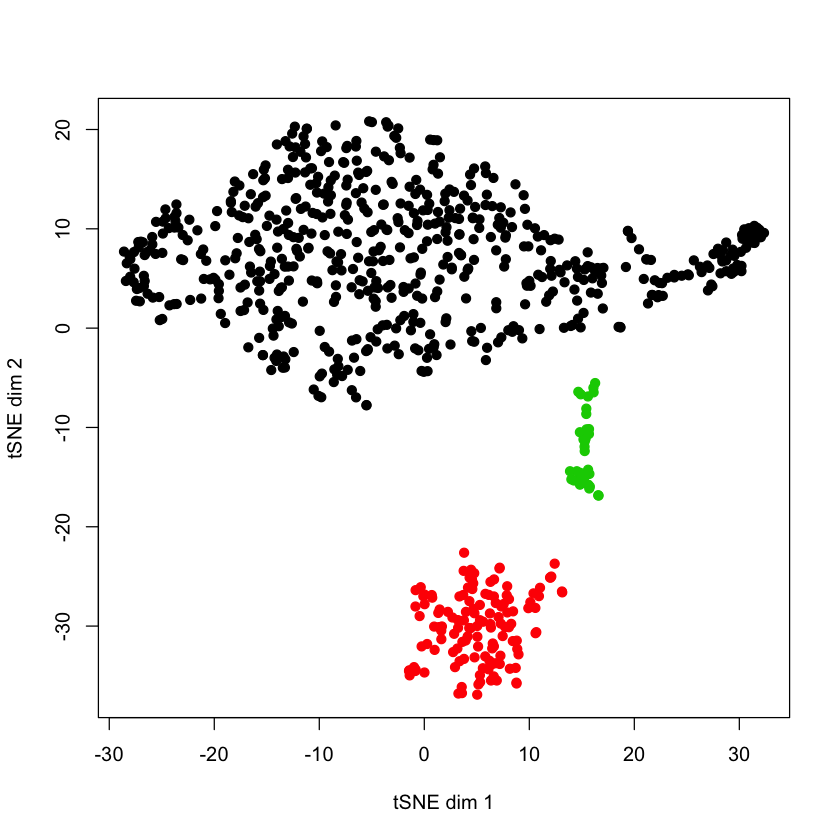

ERROR: Error in t(RPKM): object 'RPKM' not found


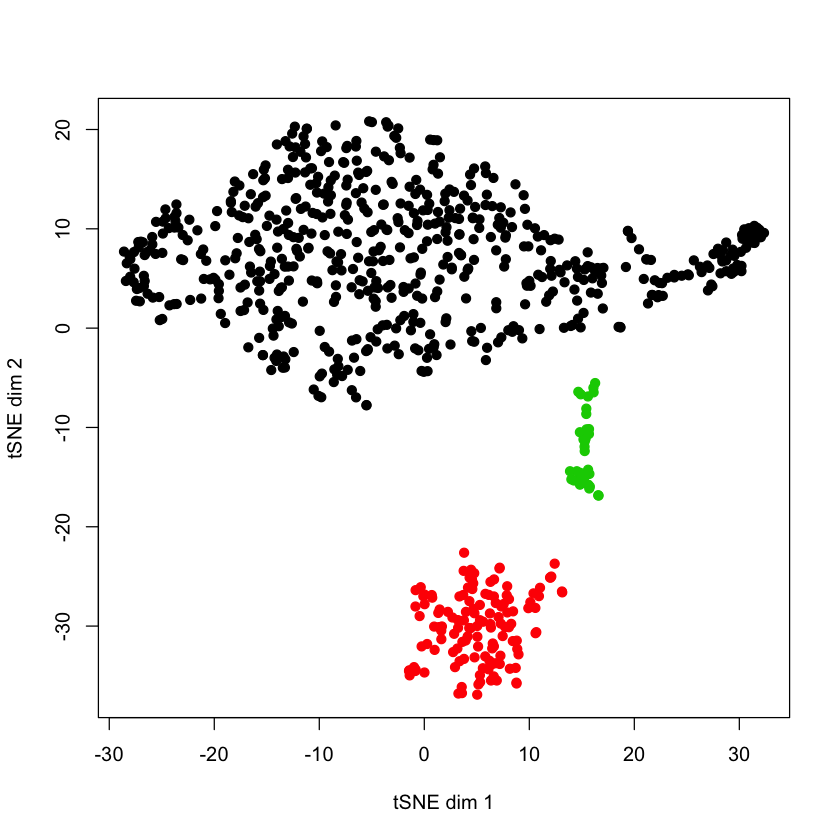

In [7]:
plot(opt_tsne,  col=dbscan(opt_tsne,eps=3.1)$cluster, pch=19, xlab="tSNE dim 1", ylab="tSNE dim 2")
CAFgroups<-dbscan(opt_tsne,eps=3.1)$cluster
CAFgroups_full<-dbscan(opt_tsne,eps=3.1)
CAFgroups[CAFgroups==0]<-1
CAFgroups_full$cluster[CAFgroups_full$cluster==0]<-1
plot(opt_tsne,  col=CAFgroups, pch=19, xlab="tSNE dim 1", ylab="tSNE dim 2")

RPKM.PCA<-prcomp(log2(t(RPKM)+1), center=TRUE)
plot(RPKM.PCA$x,main="first PCA", pch=19, col=CAFgroups)